# Dietary Patterns and Obesity Analysis

This dataset provides information for 170 countries based on the percentage of calories each country consumes from basic food cateogories, along with obesity and undernourishment rates. This dataset was originally a combination of datasets with the purpose of comparing dietary patterns, and obesity/undernourishment to Covid-19 outcomes. For the purpose of this data analysis we will only be exploring how dietary patterns relate to obesity. Data for different food groups that supply quantities, nutrition values, obesity, and undernourished percentages was obtained from the Food and Agriculture Organization of the United Nations FAO website. Data for population count for each country comes from Population Reference Bureau PRB website

Data for COVID-19 confirmed, deaths, recovered and active cases, which we will be omitting are obtained from Johns Hopkins Center for Systems Science and Engineering CSSE website, but will be removed.

The dataset can be found here: https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_kcal_Data.csv

## Data Question and Hypothesis

Data Question: Are there any significant relationships between any dietary patterns and obesity?

What is your hypothesis:

We believe that there will be significant relationships between dietary patterns and obesity. 

## Data Ethics

There are no ethical concerns with how this data was collected as far as we are aware. 

## A Note on Bias

Any analyst or scientist should be conscious of introducing bias and assumptions, however any subject dealing with human food consumption can be especially prone to these since everybody eats food whereas with other subjects the reader may be less familiar or less emotionally invested. In our analysis will try to be conscious of this pull towards bias and assumptions and ask the same of the reader. 

### IMPORTED LIBRARIES

In [6]:
import pandas as pd #used to manipulate and work with dataframe
import numpy as np # used to create and populate a ones column which provides a constant for the linear regression model
import statsmodels.api as sm #used for linear regression calculations
import matplotlib.pyplot as plt #used for graphing
import seaborn as sns #used for graphing

from missingno import matrix# used for matrix chart

#For Linear Regression Modeling 
from sklearn.model_selection import train_test_split # importing the train_test_split function from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score



In [7]:
df = pd.read_csv('Food_Supply_kcal_Data.csv') #importing the dataset

# EDA and Data Cleaning

In [8]:
df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [14]:
print(f'Data has null values: {df.isna().any().values[0]}')

Data has null values: False


In [4]:
df.tail()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
165,Venezuela (Bolivarian Republic of),0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,7.5417,0.6674,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,1.3279,1.9578,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,3.9515,0.3636,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,3.0062,0.4472,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%
169,Zimbabwe,1.4269,3.9356,0.6904,0.0,29.8044,0.1381,0.1611,0.4373,1.7491,...,6.2601,0.2532,12.3,51.3,0.232033,0.008854,0.190964,0.032214,14863000.0,%


In [5]:
df.shape

(170, 32)

In [6]:
pd.set_option('display.max_columns', 25) #so we can see all of the columns.
# pd.set_option('display.max_rows', 170)

In [7]:
df.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,...,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,1.325197,9.294553,1.267419,0.002786,20.365358,0.428504,0.631501,2.011975,3.896367,2.924466,0.159326,0.141220,...,0.017877,4.821161,0.261619,40.707045,4.872421,1.086328,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,1.062362,4.754174,1.283723,0.030879,6.467936,0.304333,0.579007,1.416149,2.216693,2.019384,0.216572,0.109816,...,0.071444,2.140639,0.285631,4.754308,2.164249,0.648232,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,1.623700,0.000000,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,0.000000,0.000000,...,0.000000,0.678600,0.000000,27.708900,0.932500,0.095700,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.361300,5.082600,0.342850,0.000000,15.306175,0.141000,0.240150,1.224525,2.080700,1.107775,0.024700,0.078250,...,0.000000,3.422175,0.046625,36.830725,3.126350,0.602600,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,1.244600,9.034100,0.877500,0.000000,19.619950,0.403750,0.478300,1.694850,3.687450,2.719800,0.088050,0.118250,...,0.000000,4.678350,0.174000,40.969700,4.660650,1.003100,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,2.028050,13.174975,1.763175,0.000000,24.841450,0.632950,0.869675,2.370700,5.278325,4.319625,0.191725,0.176625,...,0.000000,6.345800,0.389575,44.940900,6.427900,1.366950,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,1.182200,0.801500,...,0.593000,9.549200,1.421000,48.386400,10.383900,3.352400,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [8]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

Let's compare some columns that represent the same foods groups. 

In [9]:
df[['Aquatic Products, Other', 'Fish, Seafood','Sugar Crops', 'Sugar & Sweeteners']]

,"Aquatic Products, Other","Fish, Seafood",Sugar Crops,Sugar & Sweeteners
0,0.0,0.0000,0.0000,2.2261
1,0.0,0.1471,0.0000,3.4422
2,0.0,0.1195,0.0000,3.9869
3,0.0,0.8372,0.0000,2.7539
4,0.0,1.7280,0.0000,5.8218
...,...,...,...,...
165,0.0,0.4449,0.0000,7.7864
166,0.0,1.0385,0.1532,2.0940
167,0.0,0.1697,0.0000,7.0303
168,0.0,0.5714,0.0000,2.5590


Since we know we don't want to use the columns that relate to Covid-19 data, we can drop those now. We can also drop the column 'Unit (all except Population)' since all that is doing is telling us that all of our values are % except 'Population'. Since 'Aquatic Products, Other' column is mostly zeroes and we have a 'Fish, Seafood' column that is complete, we'll also drop 'Aquatic Products, Other'.

In [10]:
df.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'Unit (all except Population)','Aquatic Products, Other', 'Sugar Crops'], inplace=True)

Let's get a general overview of our data types and any null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Alcoholic Beverages       170 non-null    float64
 2   Animal Products           170 non-null    float64
 3   Animal fats               170 non-null    float64
 4   Cereals - Excluding Beer  170 non-null    float64
 5   Eggs                      170 non-null    float64
 6   Fish, Seafood             170 non-null    float64
 7   Fruits - Excluding Wine   170 non-null    float64
 8   Meat                      170 non-null    float64
 9   Milk - Excluding Butter   170 non-null    float64
 10  Miscellaneous             170 non-null    float64
 11  Offals                    170 non-null    float64
 12  Oilcrops                  170 non-null    float64
 13  Pulses                    170 non-null    float64
 14  Spices    

We have some <2.5 values in our Undernourished columns that are going to interfere with our linear regression so we'll clean those up now. We can also remove the * beside Taiwan's name. Let's change the column name 'Miscellaneous' to Infant food, since that's what the data key tells us it primarily represents. 

In [12]:
df['Undernourished'].replace( "<2.5" , "2.49", inplace=True) 
df['Country'].replace('Taiwan*','Taiwan', inplace=True)
df.rename(columns = {'Miscellaneous':'Infant Food'}, inplace = True)

Let's convert our 'Undernourished' column to a float so we'll be able to use it later in our modelling. 

In [13]:
df['Undernourished'] = pd.to_numeric(df['Undernourished'])

In [14]:
df['Undernourished'].dtypes

dtype('float64')

In [15]:
pd.isna(df).sum()# checking for Na values. 

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Infant Food                 0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     3
Undernourished              7
Population                  0
dtype: int64

We can get a visualization of where our NaN's are by using the matrix function. 

<AxesSubplot:>

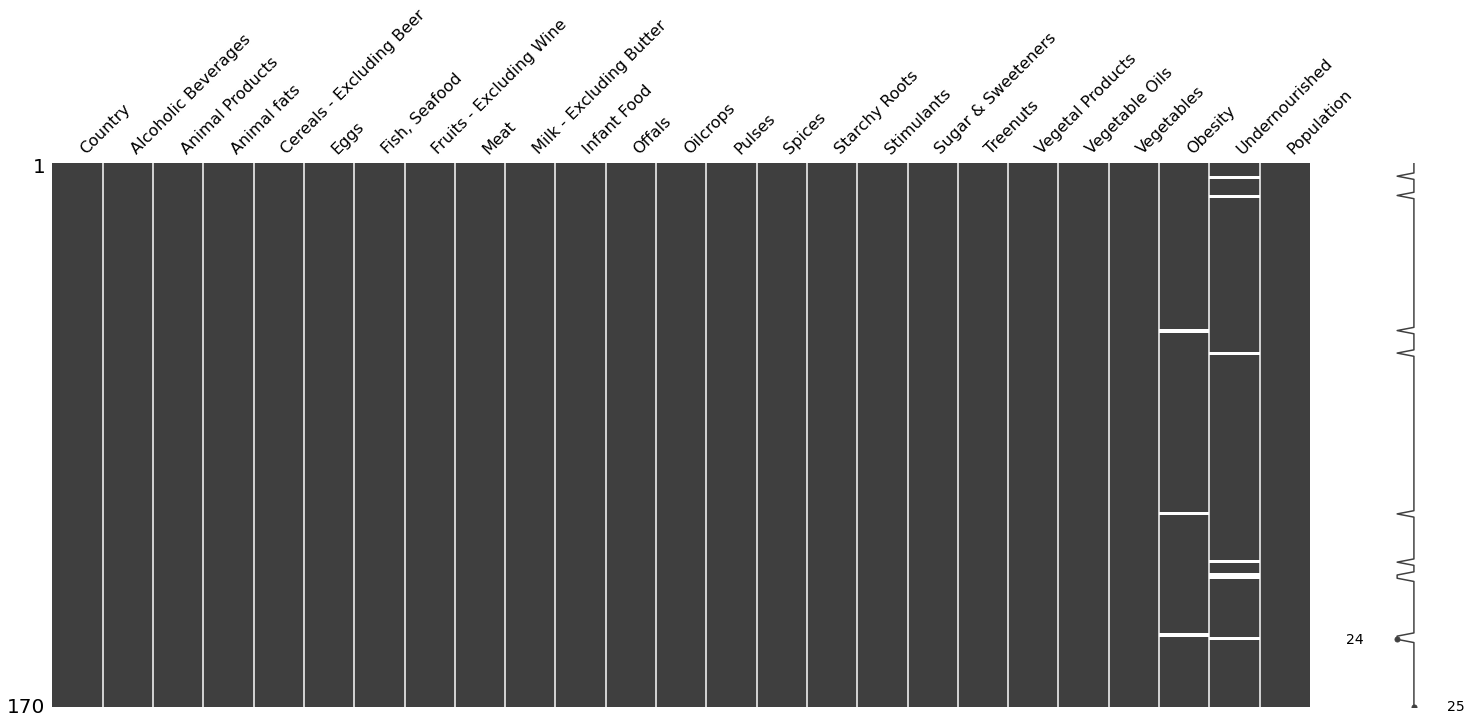

In [16]:
matrix(df)

We can see that our NaNs are in our Undernourished and Obesity columns. Let's find out what rows they're on.

In [17]:
df[df['Undernourished'].isna()]

,Country,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Population
4,Antigua and Barbuda,2.3041,15.3672,1.5429,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,5.8218,0.0823,34.6225,4.6904,1.2960,19.1,NaN,98000.0
10,Bahamas,2.9145,14.7930,1.4205,10.7274,0.6613,1.2491,4.4575,8.1803,2.9880,1.0776,0.2694,1.0287,0.1225,0.2204,0.7103,0.4164,8.6701,0.1714,35.2437,3.1594,1.5185,32.1,NaN,393000.0
59,Grenada,1.9979,12.2581,0.7284,13.7565,0.7284,1.1446,3.5588,5.7648,3.8085,0.3538,0.0832,1.1863,1.3111,0.6452,1.1446,0.3122,7.9084,0.0416,37.7523,4.9116,0.6035,20.2,NaN,113000.0
124,Republic of Moldova,2.0672,12.2990,1.7958,21.3823,0.6264,0.4803,1.1485,3.6542,5.5753,0.1670,0.1670,0.0835,0.1462,0.0209,1.7540,0.3132,4.6356,0.0418,37.6905,4.7818,1.1693,20.1,NaN,3535000.0
128,Saint Kitts and Nevis,1.6696,14.2715,1.6498,13.3969,0.3180,0.9541,2.2262,7.5929,3.5778,0.5367,0.1988,1.2324,1.0733,0.1789,1.2522,0.0994,6.7780,0.2186,35.7185,6.5196,0.5367,23.1,NaN,54000.0
129,Saint Lucia,2.5564,14.6429,1.0526,15.3571,0.2444,1.2218,2.0113,8.9286,2.9323,0.4323,0.2632,0.8647,1.1090,0.3383,1.2406,0.3571,7.4436,0.1880,35.3571,2.6692,0.7895,19.8,NaN,182000.0
148,Tajikistan,0.1427,5.1831,0.0000,27.4132,0.2140,0.0238,1.5216,2.3776,2.3776,0.0951,0.1664,0.4042,0.5944,0.0476,1.3790,0.3566,3.8992,0.1189,44.8407,5.4922,3.3524,12.6,NaN,9429000.0


In [18]:
df[df['Obesity'].isna()]
# df['Country'][df['Obesity'].isna()]

,Country,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Population
52,French Polynesia,1.4879,15.0676,1.8129,15.8885,0.4960,1.6419,1.0433,8.1409,2.7364,1.1459,0.2223,2.4457,0.3250,0.0171,1.9155,0.6670,3.5574,0.1539,34.9410,5.3019,0.8551,NaN,4.2,280000.0
109,New Caledonia,1.9087,13.3430,1.4361,15.9607,0.6362,0.8544,1.6906,6.5261,3.7448,1.1089,0.1272,1.7633,0.2545,0.0909,1.2543,0.7635,4.2720,0.1272,36.6661,6.4716,0.9998,NaN,7.1,295000.0
147,Taiwan,1.2767,10.9525,1.0415,15.4208,0.9071,0.7559,2.0830,6.9881,1.1423,0.0840,0.1008,1.9150,0.4200,0.2016,0.4536,0.2688,4.8715,0.7055,39.0391,9.4742,1.8478,NaN,3.5,23610000.0


We were able to source the missing data for all of our NaN's but two in the Undernourished column with data sourced from CEIC, Trading Economics, World Bank, NAHSIT, ResearchGate, and WHO.

In [19]:
#Replacing all the NaN values in undernourished column with data sourced from CEIC, Trading Economics and World Bank.
df['Undernourished'] = np.where(df.Country == 'Antigua and Barbuda', 26.70, df.Undernourished)
df['Undernourished'] = np.where(df.Country == 'Bahamas', 10, df.Undernourished)
df['Undernourished'] = np.where(df.Country == 'Grenada', 25.5, df.Undernourished)
df['Undernourished'] = np.where(df.Country == 'Republic of Moldova', 8.5, df.Undernourished)
df['Undernourished'] = np.where(df.Country == 'Tajikistan', 30.1, df.Undernourished)

#Replacing all the NaN values in undernourished column with data sourced from NAHSIT, ResearchGate, WHO
df['Obesity'] = np.where(df.Country == 'French Polynesia', 33.1, df.Obesity)
df['Obesity'] = np.where(df.Country == 'New Caledonia', 35.5, df.Obesity)
df['Obesity'] = np.where(df.Country == 'Taiwan', 22.8, df.Obesity)

In [20]:
pd.isna(df).sum() #Verification NaNs have been removed

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Infant Food                 0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     0
Undernourished              2
Population                  0
dtype: int64

We couldn't find the undernourished values for Saint Kitts and Nevis and Saint Luca, so let's drop those. 

In [21]:
df=df.dropna()

Now let's take stock of our zeros since they might end up skewing our model.

In [22]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print(column_name,':',count)

Country : 0
Alcoholic Beverages : 10
Animal Products : 0
Animal fats : 2
Cereals - Excluding Beer : 0
Eggs : 0
Fish, Seafood : 1
Fruits - Excluding Wine : 0
Meat : 0
Milk - Excluding Butter : 0
Infant Food : 22
Offals : 3
Oilcrops : 0
Pulses : 6
Spices : 18
Starchy Roots : 0
Stimulants : 3
Sugar & Sweeteners : 0
Treenuts : 20
Vegetal Products : 0
Vegetable Oils : 0
Vegetables : 0
Obesity : 0
Undernourished : 0
Population : 0


Let's plot out the mean, median and mode for these columns just in case we want to replace the zeros at some point.

In [23]:
df[['Treenuts', 'Pulses','Spices','Infant Food', 'Offals', 'Fish, Seafood', 'Animal fats', 'Stimulants']].mean()

Treenuts         0.262313
Pulses           1.109098
Spices           0.182304
Infant Food      0.155455
Offals           0.140151
Fish, Seafood    0.626067
Animal fats      1.266422
Stimulants       0.306293
dtype: float64

In [24]:
df[['Treenuts', 'Pulses','Spices','Infant Food', 'Offals', 'Fish, Seafood', 'Animal fats', 'Stimulants']].median()

Treenuts         0.17290
Pulses           0.70070
Spices           0.08435
Infant Food      0.08735
Offals           0.11790
Fish, Seafood    0.46675
Animal fats      0.83245
Stimulants       0.20675
dtype: float64

In [25]:
df[['Treenuts', 'Pulses','Spices','Infant Food', 'Offals', 'Fish, Seafood', 'Animal fats', 'Stimulants']].mode()

,Treenuts,Pulses,Spices,Infant Food,Offals,"Fish, Seafood",Animal fats,Stimulants
0,0.0,0.0,0.0,0.0,0.0,0.3399,0.0,0.0


In [26]:
df[['Treenuts', 'Pulses','Spices','Infant Food', 'Offals', 'Fish, Seafood', 'Animal fats', 'Stimulants']].std()

Treenuts         0.287260
Pulses           1.211831
Spices           0.238787
Infant Food      0.214829
Offals           0.109972
Fish, Seafood    0.580107
Animal fats      1.290940
Stimulants       0.313596
dtype: float64

We have quite a big difference between our mean, median and mode, with zeros being the number occuring the most. Let's get a visual of how the data is distributed for some of these categories. 

Text(0.5, 0.98, 'Infant Food')

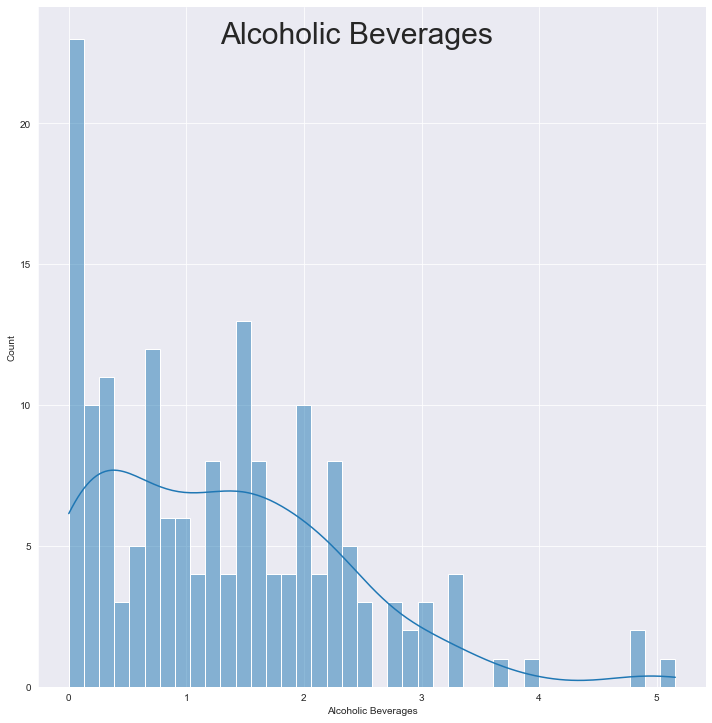

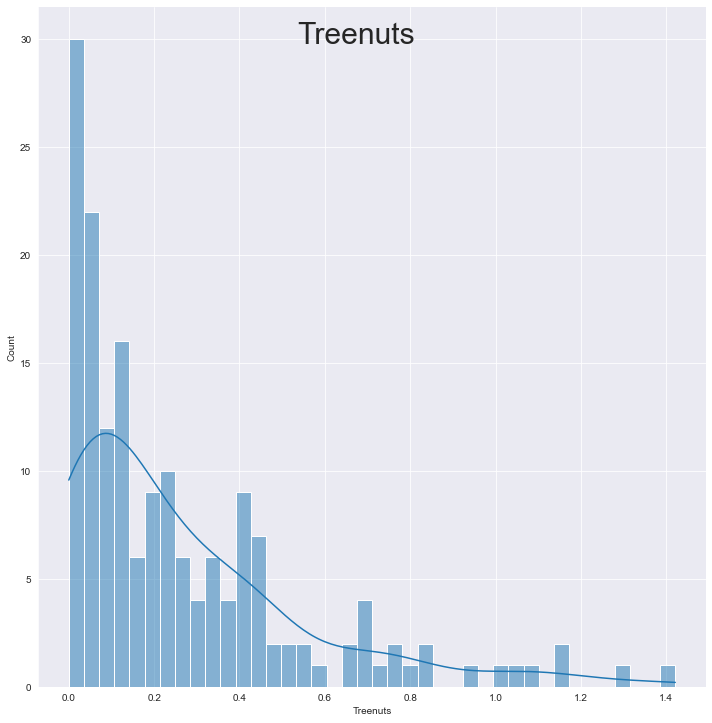

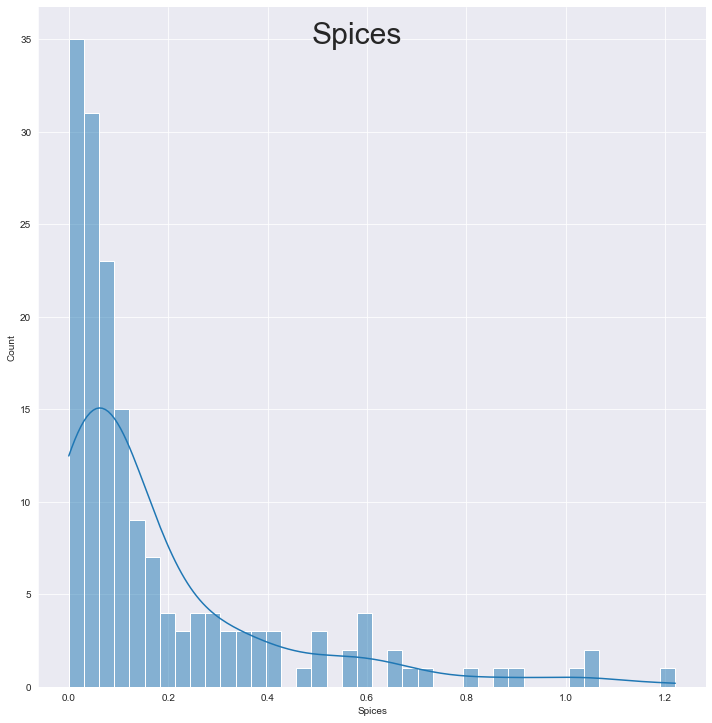

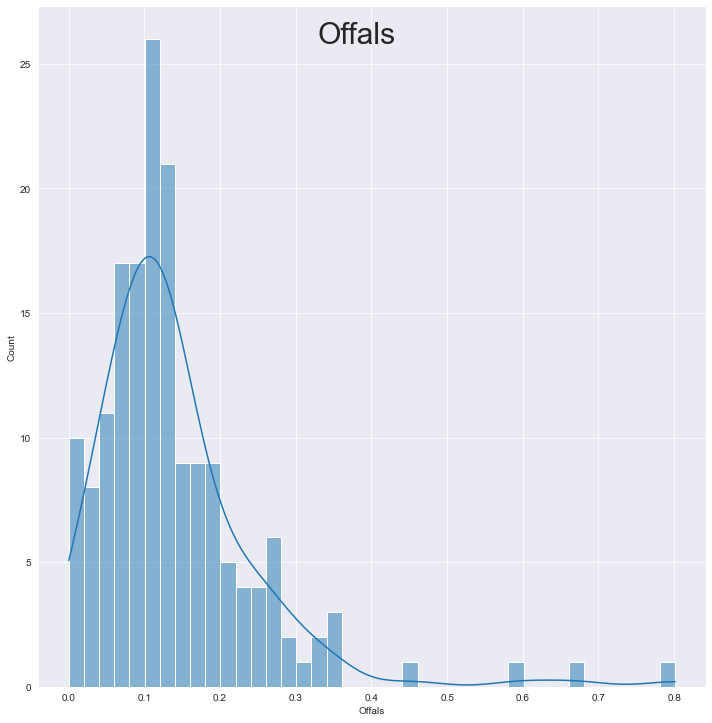

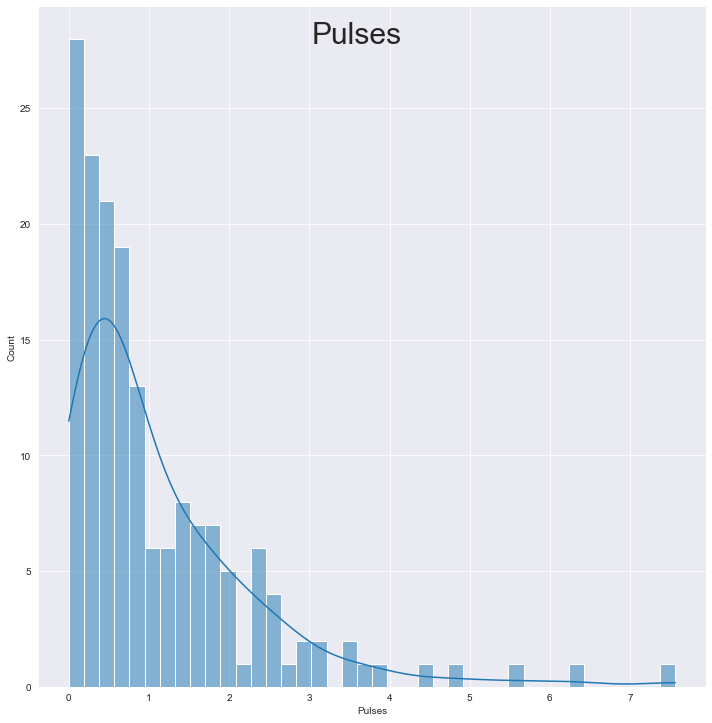

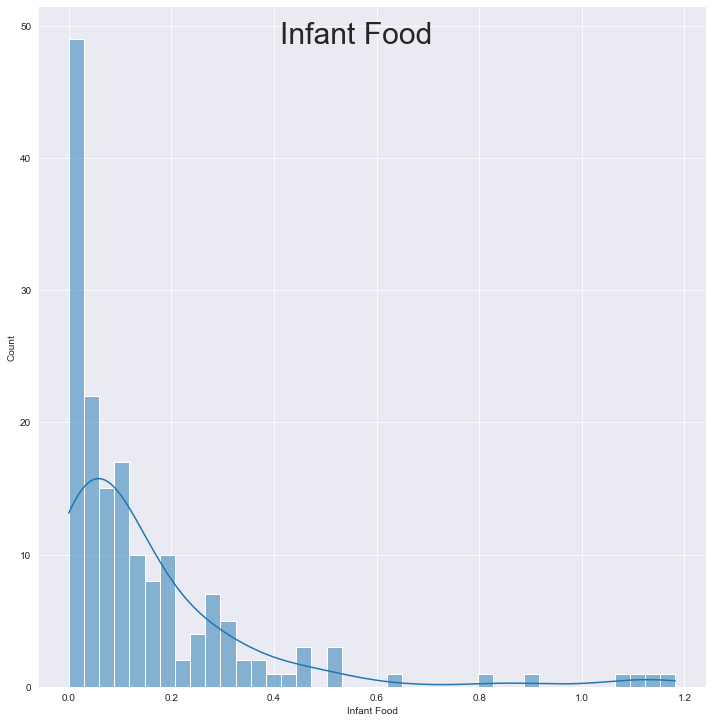

In [27]:
sns.set_style('darkgrid') #Set style to dark grid for readability

#used to check how sales are distributed across entire dataset
AB_Plot = sns.displot(df, x='Alcoholic Beverages',  bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
AB_Plot.fig.suptitle('Alcoholic Beverages', fontsize=30)

#used to check how sales are distributed across entire dataset
Treenuts_Plot = sns.displot(df, x='Treenuts', bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
Treenuts_Plot.fig.suptitle('Treenuts', fontsize=30)

#used to check how sales are distributed across entire dataset
Spice_Plot = sns.displot(df, x='Spices', bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
Spice_Plot.fig.suptitle('Spices', fontsize=30)


#used to check how sales are distributed across entire dataset
Offals_Plot = sns.displot(df, x='Offals', bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
Offals_Plot.fig.suptitle('Offals', fontsize=30)

#used to check how sales are distributed across entire dataset
Pulses_Plot = sns.displot(df, x='Pulses', bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
Pulses_Plot.fig.suptitle('Pulses', fontsize=30)

#used to check how sales are distributed across entire dataset
InfantFood_Plot = sns.displot(df, x='Infant Food', bins=40, height=10, aspect=1, kde=True)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=1)
#adds a title to the visual output
InfantFood_Plot.fig.suptitle('Infant Food', fontsize=30)


We can see that in all our cases the data is skewed as one tailed normal distribution. For the Alcoholic Beverages category it makes sense since alcohol is illegal in the countries where the value is zero. However, for all other columns we're not very certain that the zero values are entirely accurate. For example, do Hungarians actually consume zero amount of Offals(organ meat), and Georgians no Pulses(Legumes)?

Ultimately, it is beyond the scope and time allotment of this project to verify all of these categories. We'll include the code to replace all zero values with median for all relevant columns should we or other analysts decide to inverstigate the matter further, but for now we will not run the code block with the median values and will leave the data as is. We suggest using the median because of the already skewed distribution, which would cause using the mean to have an even more drastic effect. 

After testing various permutations including all, on part of the median values for the columns listed below, in almost every case, once we run our linear regression models, Infant food becomes the category most correlated with obesity. This could be an area that will justify future research and analysis. 

In [28]:
# df['Treenuts'] = df['Treenuts'].replace(0, 0.17290) 
# df['Pulses'] = df['Pulses'].replace(0, 0.70070) 
# df['Spices'] = df['Spices'].replace(0, 0.08435) 
# df['Infant Food'] = df['Infant Food'].replace(0, 0.08735) 
# df['Offals'] = df['Offals'].replace(0, 0.11790) 
# df['Fish, Seafood'] = df['Fish, Seafood'].replace(0,  0.46675)
# df['Animal fats'] = df['Animal fats'].replace(0, 0.83245)
# df['Stimulants'] = df['Stimulants'].replace(0, 0.20675)

# Median Values
# Treenuts         0.17325
# Pulses           0.70070
# Spices           0.08435
# Infant Food      0.08735
# Offals           0.11790
# Fish, Seafood    0.46675
# Animal fats      0.83245
# Stimulants       0.20675

Let's take a look at the distribution of our Obesity column since this will be our dependent variable in our linear regression model. 

Text(0.5, 0.98, 'Obesity Distribution by Percentage of Population Count')

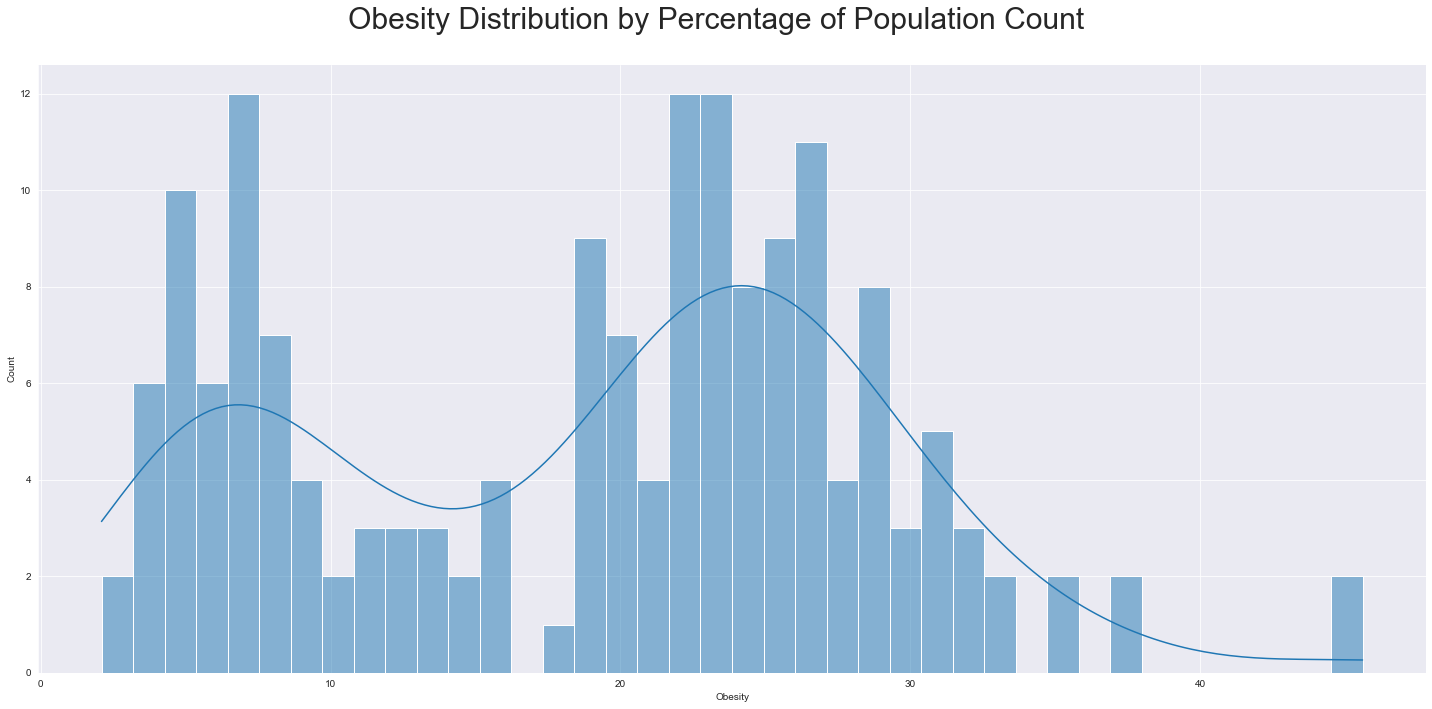

In [83]:
#used to check how sales are distributed across entire dataset
Obesity_Normal_Plot = sns.displot(df, x='Obesity', bins=40, height=10, aspect=2, kde=True,)

#gives a little bit of padding to bottom of the title
plt.subplots_adjust(top=0.9)
#adds a title to the visual output
Obesity_Normal_Plot.fig.suptitle('Obesity Distribution by Percentage of Population Count', fontsize=30)

We have something relatively close to bi-modal distrubution but everything looks ok. 

In [30]:
corr_analysis = df.corr()

<AxesSubplot:>

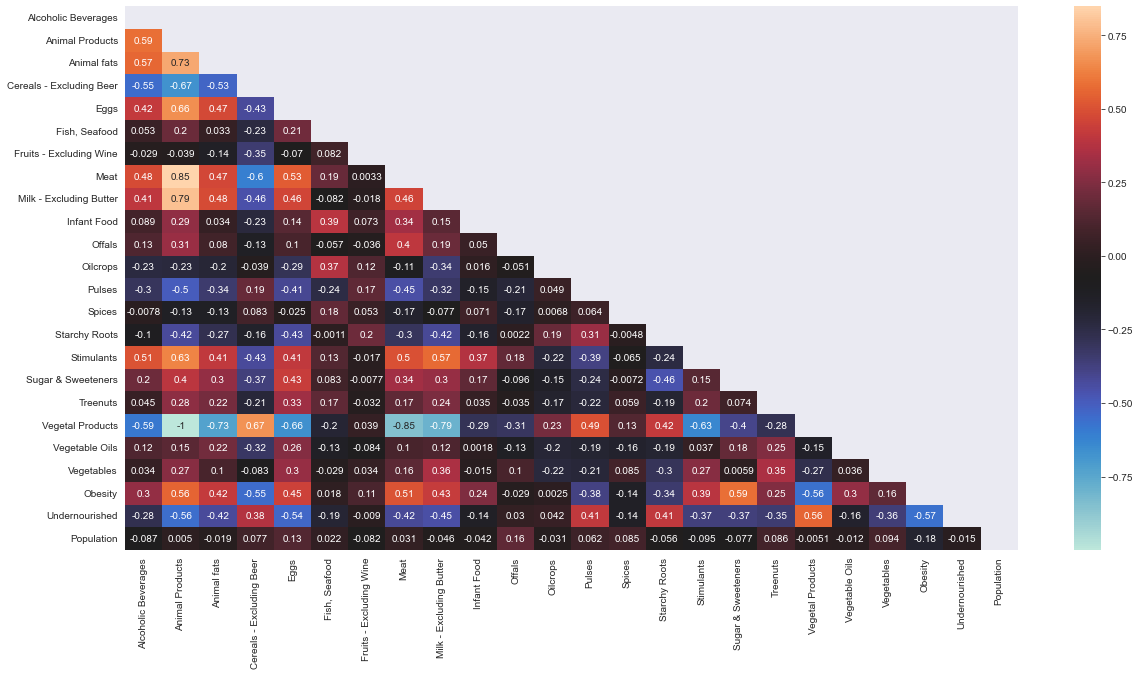

In [31]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr_analysis, mask=mask, annot=True,  cmap="icefire")

From the above heatmap we can notice that we have a perfectly inverse relationship of -1 between the amount of animal products consumed when compared to vegetal products. These are both very broad categories and constitute the largest percentages consumed out of all the categories. There is the possibility that keeping both of them would create a strong pull in our linear regression model. Near the end of this notebook, we'll see how are regression models are affected running the various permutations of eliminating these categories separately and simulataneously. Initially, we'll leave them both in. 

Text(0.5, 1.0, 'Animal Products Vs Vegetal Products Comparison')

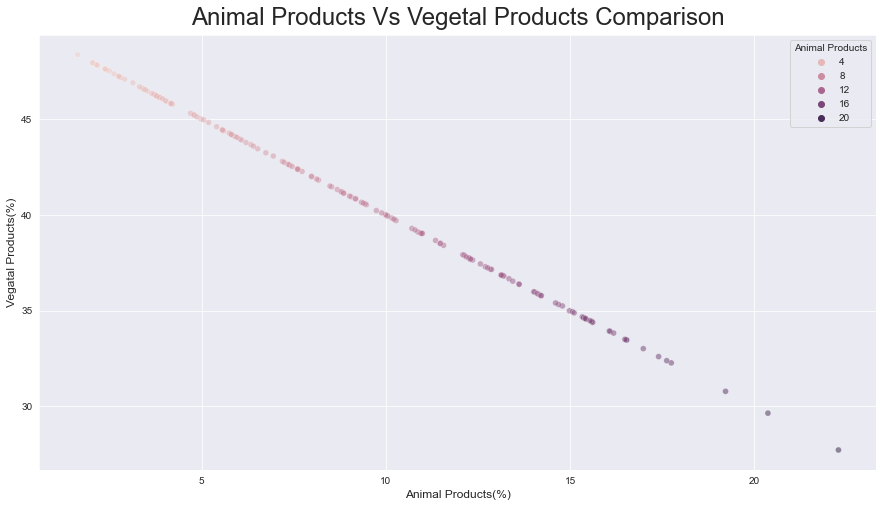

In [32]:
plt.figure(figsize=(15,8))
ax=sns.scatterplot(data=df, x='Animal Products', y='Vegetal Products', hue='Animal Products', alpha=0.5)
ax.set_xlabel( "Animal Products(%)", size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Vegatal Products(%)", size = 12)
  
# Set title for plot
ax.set_title( "Animal Products Vs Vegetal Products Comparison", size = 24, pad=10)

We can see above how Animal products and Vegetal Products and inversely correlated. 

# Statistical Analysis

Let's begin our linear regression to find out what, if any categories are related to obesity.

In [33]:
#Setting up our variables for linear regression
df['intercept'] = np.ones((df.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
dependent_vars = df['Obesity']
independent_vars = df[['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables','Undernourished', 'Population','intercept']]
independent_vars.head()

,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Undernourished,Population,intercept
0,0.0000,4.7774,0.8504,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,2.2261,0.1251,45.2476,2.3012,0.7504,29.8,38928000.0,1.0
1,0.9120,16.0930,1.0591,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,3.4422,0.3972,33.9070,2.8244,2.7508,6.2,2838000.0,1.0
2,0.0896,6.0326,0.1941,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,3.9869,0.2240,43.9749,5.7638,2.0457,3.9,44357000.0,1.0
3,1.9388,4.6927,0.2644,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,2.7539,0.0000,45.3184,4.2741,0.3525,25.0,32522000.0,1.0
4,2.3041,15.3672,1.5429,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,5.8218,0.0823,34.6225,4.6904,1.2960,26.7,98000.0,1.0


In [34]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     15.34
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.32e-28
Time:                        14:21:43   Log-Likelihood:                -516.51
No. Observations:                 168   AIC:                             1081.
Df Residuals:                     144   BIC:                             1156.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Alcoholic Beverages     

Our results are quite good with an R-squared of 0.71. Our 'Spices' category is the highest p-value above our threshold of 0.05, so let's eliminate that column and run the model again and see if we can improve it further. 

In [35]:
#Setting up our variables for linear regression
dependent_vars = df['Obesity']#volume will be our dependent variable
independent_vars2 = df[['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Pulses','Starchy Roots', 'Stimulants',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables','Undernourished', 'Population','intercept']]
df['intercept'] = np.ones((df.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
independent_vars2.head()

,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Pulses,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Undernourished,Population,intercept
0,0.0000,4.7774,0.8504,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.3252,0.0750,2.2261,0.1251,45.2476,2.3012,0.7504,29.8,38928000.0,1.0
1,0.9120,16.0930,1.0591,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,1.2651,0.2501,3.4422,0.3972,33.9070,2.8244,2.7508,6.2,2838000.0,1.0
2,0.0896,6.0326,0.1941,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,1.9262,0.1493,3.9869,0.2240,43.9749,5.7638,2.0457,3.9,44357000.0,1.0
3,1.9388,4.6927,0.2644,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,12.6239,0.0441,2.7539,0.0000,45.3184,4.2741,0.3525,25.0,32522000.0,1.0
4,2.3041,15.3672,1.5429,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.8434,0.4937,5.8218,0.0823,34.6225,4.6904,1.2960,26.7,98000.0,1.0


In [36]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars2)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     16.14
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           8.22e-29
Time:                        14:21:43   Log-Likelihood:                -516.52
No. Observations:                 168   AIC:                             1079.
Df Residuals:                     145   BIC:                             1151.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Alcoholic Beverages     

We have a slight increase in our adjusted R-squared but now our 'Vegetal Products' is above our threshold, so we'll eliminate that next. 

In [37]:
#Setting up our variables for linear regression
dependent_vars = df['Obesity']#volume will be our dependent variable
independent_vars3 = df[['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Pulses','Starchy Roots', 'Stimulants',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Vegetables','Undernourished', 'Population','intercept']]
       
independent_vars.head()
df['intercept'] = np.ones((df.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
independent_vars3.head()

,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Pulses,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Undernourished,Population,intercept
0,0.0000,4.7774,0.8504,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.3252,0.0750,2.2261,0.1251,2.3012,0.7504,29.8,38928000.0,1.0
1,0.9120,16.0930,1.0591,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,1.2651,0.2501,3.4422,0.3972,2.8244,2.7508,6.2,2838000.0,1.0
2,0.0896,6.0326,0.1941,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,1.9262,0.1493,3.9869,0.2240,5.7638,2.0457,3.9,44357000.0,1.0
3,1.9388,4.6927,0.2644,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,12.6239,0.0441,2.7539,0.0000,4.2741,0.3525,25.0,32522000.0,1.0
4,2.3041,15.3672,1.5429,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.8434,0.4937,5.8218,0.0823,4.6904,1.2960,26.7,98000.0,1.0


In [38]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars3)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     16.85
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.22e-29
Time:                        14:21:43   Log-Likelihood:                -517.13
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     146   BIC:                             1147.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Alcoholic Beverages     

Our adjusted R-squared has remained the same, but we'll try removing Pulses since it's the next highest p-value and see if our model will improve. 

In [39]:
#Setting up our variables for linear regression
dependent_vars = df['Obesity']#volume will be our dependent variable
independent_vars4 = df[['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Vegetables','Undernourished', 'Population','intercept']]
       
       
independent_vars.head()
df['intercept'] = np.ones((df.shape[0],))#creates a column with a constant of 1 for each row in order to run our liner regression
independent_vars4.head()

,Alcoholic Beverages,Animal Products,Animal fats,Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Infant Food,Offals,Oilcrops,Starchy Roots,Stimulants,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Undernourished,Population,intercept
0,0.0000,4.7774,0.8504,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.3252,0.0750,2.2261,0.1251,2.3012,0.7504,29.8,38928000.0,1.0
1,0.9120,16.0930,1.0591,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,1.2651,0.2501,3.4422,0.3972,2.8244,2.7508,6.2,2838000.0,1.0
2,0.0896,6.0326,0.1941,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.9262,0.1493,3.9869,0.2240,5.7638,2.0457,3.9,44357000.0,1.0
3,1.9388,4.6927,0.2644,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,12.6239,0.0441,2.7539,0.0000,4.2741,0.3525,25.0,32522000.0,1.0
4,2.3041,15.3672,1.5429,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.8434,0.4937,5.8218,0.0823,4.6904,1.2960,26.7,98000.0,1.0


In [40]:
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars4)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     17.50
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.80e-29
Time:                        14:21:43   Log-Likelihood:                -518.18
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     147   BIC:                             1144.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Alcoholic Beverages     

Let's eliminate Alcoholic Beverages.

In [41]:
#Setting up our variables for linear regression
independent_vars5 = df[[ 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Vegetables','Undernourished', 'Population','intercept']]
       
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars5)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     18.36
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           6.85e-30
Time:                        14:21:43   Log-Likelihood:                -518.79
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     148   BIC:                             1140.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Animal Products         

Now we'll eliminate Vegetables.

In [42]:
#Setting up our variables for linear regression
independent_vars6 = df[[ 'Animal Products', 'Animal fats',
        'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
       
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars6)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     19.04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           5.17e-30
Time:                        14:21:43   Log-Likelihood:                -520.23
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     149   BIC:                             1138.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Animal Products         

Now let's drop Cereals.

In [43]:
#Setting up our variables for linear regression
independent_vars7 = df[[ 'Animal Products', 'Animal fats',
        'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
       'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
       
       
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars7)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     19.94
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.68e-30
Time:                        14:21:43   Log-Likelihood:                -521.25
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     150   BIC:                             1135.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

We'll drop Starchy Roots.

In [44]:
#Setting up our variables for linear regression
independent_vars8 = df[[ 'Animal Products', 'Animal fats',
        'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food', 'Offals', 'Oilcrops',
        'Stimulants','Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
       
       
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars8)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     21.07
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.04e-30
Time:                        14:21:43   Log-Likelihood:                -521.95
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     151   BIC:                             1131.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

Let's drop Offals.

In [45]:
#Setting up our variables for linear regression
independent_vars9 = df[[ 'Animal Products', 'Animal fats',
        'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food','Oilcrops',
        'Stimulants',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars9)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     21.97
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           9.44e-31
Time:                        14:21:43   Log-Likelihood:                -523.65
No. Observations:                 168   AIC:                             1079.
Df Residuals:                     152   BIC:                             1129.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

Let's drop Fish and Seafood.

In [46]:
#Setting up our variables for linear regression
independent_vars10 = df[[ 'Animal Products', 'Animal fats',
        'Eggs',
        'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Infant Food','Oilcrops',
        'Stimulants',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars10)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     23.53
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.67e-31
Time:                        14:21:43   Log-Likelihood:                -524.04
No. Observations:                 168   AIC:                             1078.
Df Residuals:                     153   BIC:                             1125.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

Let's drop Stimulants.

In [47]:
#Setting up our variables for linear regression
independent_vars11 = df[[ 'Animal Products', 'Animal fats',
        'Eggs','Fruits - Excluding Wine','Meat','Milk - Excluding Butter', 'Infant Food','Oilcrops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
        
       
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars11)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     24.68
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           2.72e-31
Time:                        14:21:43   Log-Likelihood:                -525.92
No. Observations:                 168   AIC:                             1080.
Df Residuals:                     154   BIC:                             1124.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

Finally, we'll drop fruits. 

In [48]:
#Setting up our variables for linear regression
independent_vars11 = df[[ 'Animal Products', 'Animal fats',
        'Eggs', 'Meat', 'Milk - Excluding Butter', 'Infant Food','Oilcrops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils',
       'Undernourished', 'Population','intercept']]
       
        
#Linear regression calculation
lin_reg = sm.OLS(dependent_vars, independent_vars11)
reg_results = lin_reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     25.79
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           4.37e-31
Time:                        14:21:43   Log-Likelihood:                -528.32
No. Observations:                 168   AIC:                             1083.
Df Residuals:                     155   BIC:                             1123.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Animal Products           

At this point, removing any further categories decreases our R-squared and adjusted R-squared too much, so we'll end this part of our process here. 

All our p-values are < 0.05 and we have a moderately good R-squared value.  The food categories that we're left with are a mix of things we might expect and some that might surprise us.  For advocates of a vegan diet, it has been said that "the fat you eat is the fat you wear", and that this applies to any source of fat. So the inclusion of Treenuts, Vegetable Oils and Oil Crops, would not be too surprising, and neither would the inclusion of the individual animal products. We're not quite sure why Animal Products as a whole has a negative correlation and is something worth looking into further.  

The negative correlation of Population is mainly caused by China and India having such large populations and low obesity. Unsurpisingly, Undernourished has negative correlation but perhaps not as negative as we might expect. The reason for this is most likely coming from countries that have a relatively even mixture between both. 

# Machine Learning

We'll use some machine learning to cross validate our findings. We'll explore again what occurs when we run our permutations with removing Animal Products and Vegetal Products one at a time, then together too. But first we'll run it including both. 

In [49]:
# including all previous columns, only dropping the dependent variable 'Obesity'
df_CrossValidation = df.drop(labels=['Country'], axis=1) #because scikit can't have non-numerical data. 
X = df_CrossValidation.drop(labels='Obesity', axis=1)

# ensuring our y (prediction) is only included
y = df_CrossValidation['Obesity']



In [50]:
# the 'test_size' parameter is where we'll change our ratio mentioned above
# 'random state' refers to the 'seed' used to ensure we have the same starting point each time we run this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5600)

In [51]:
#Printing shape to see the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(151, 24)
(17, 24)
(151,)
(17,)


In [52]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

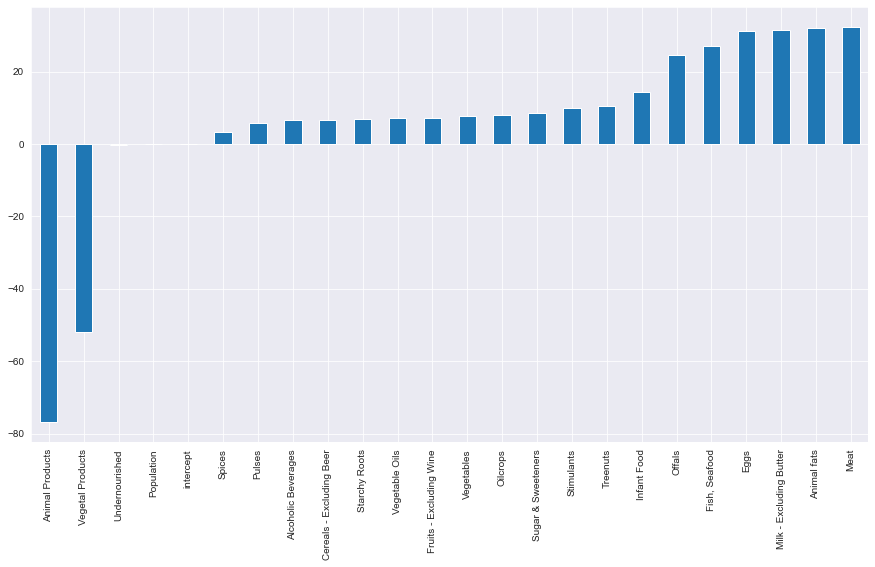

In [53]:
plt.figure(figsize=(15,8))
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
coeff.plot(kind='bar')

In [54]:
#Model Test
y_pred = lr.predict(X_test)

In [55]:
# calculating MSE; closer to zero is better
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# calculating R-Square; closer to 1 is better
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 24.47
R-Square: 0.71


0.71 is a strong relationship and the crossvalidation is nearly identical to our previous linear regression model. We can see that many of the same categories as before are the most correlated with obesity. 

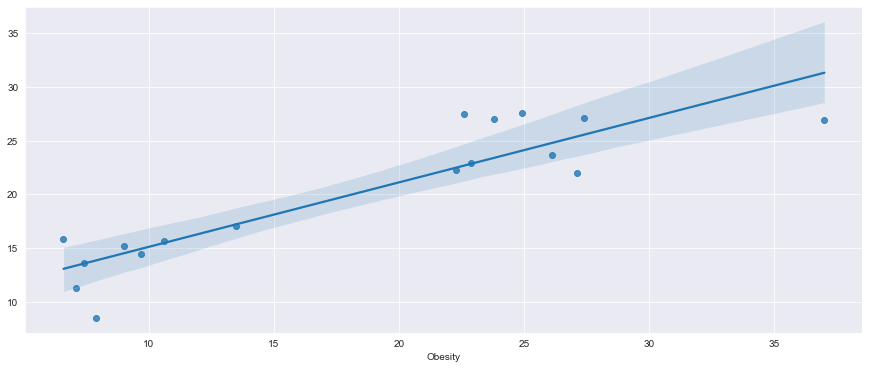

In [56]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred)
plt.show()

Let's remove our Animal Products column to see if our results undergo any substantially changes. 

In [57]:
# including all previous columns, only dropping the dependent variable 'Obesity'
df_CrossValidation = df.drop(labels=['Country','Animal Products'], axis=1) #Country because scikit can't have non-numerical data. 
X = df_CrossValidation.drop(labels='Obesity', axis=1)

# ensuring our y (prediction) is only included
y = df_CrossValidation['Obesity']



In [58]:
# the 'test_size' parameter is where we'll change our ratio mentioned above
# 'random state' refers to the 'seed' used to ensure we have the same starting point each time we run this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5600)

In [59]:
#Printing shape to see the  split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(151, 23)
(17, 23)
(151,)
(17,)


In [60]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

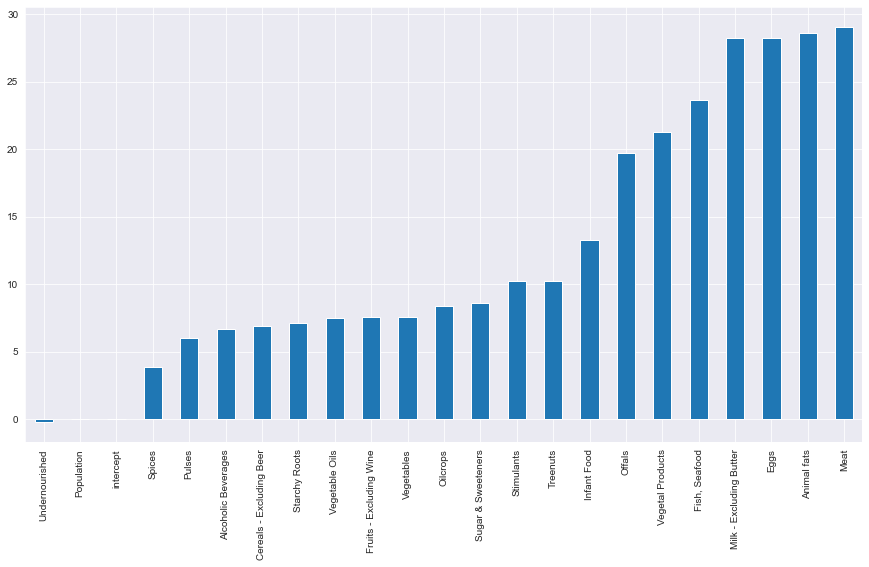

In [61]:
plt.figure(figsize=(15,8))
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
coeff.plot(kind='bar')

In [62]:
#Model Test
y_pred = lr.predict(X_test)

In [63]:
# calculating MSE; closer to zero is better
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# calculating R-Square; closer to 1 is better
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 23.49
R-Square: 0.72


The results are overall very similar however this time Vegetal Products ranks much higher.

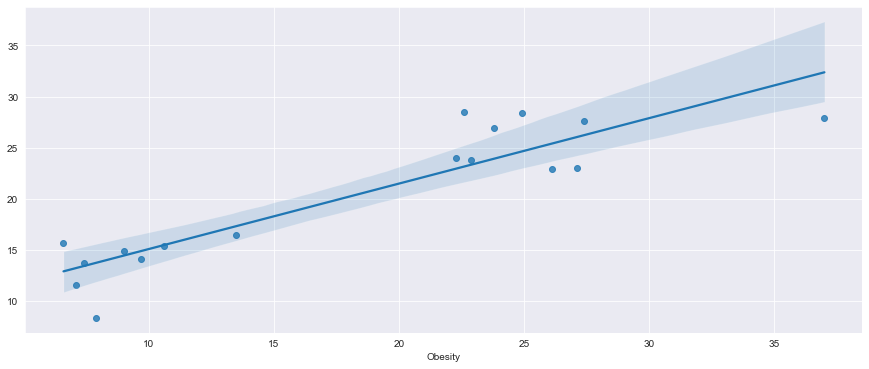

In [64]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred)
plt.show()

Now let's try with Vegetal Products removed.

In [65]:
# including all previous columns, only dropping the dependent variable 'Obesity'
df_CrossValidation = df.drop(labels=['Country','Vegetal Products'], axis=1) #because scikit can't have non-numerical data. 
X = df_CrossValidation.drop(labels='Obesity', axis=1)

# ensuring our y (prediction) is only included
y = df_CrossValidation['Obesity']



In [66]:
# the 'test_size' parameter is where we'll change our ratio mentioned above
# 'random state' refers to the 'seed' used to ensure we have the same starting point each time we run this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5600)

In [67]:
#Printing shape to see the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(151, 23)
(17, 23)
(151,)
(17,)


In [68]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

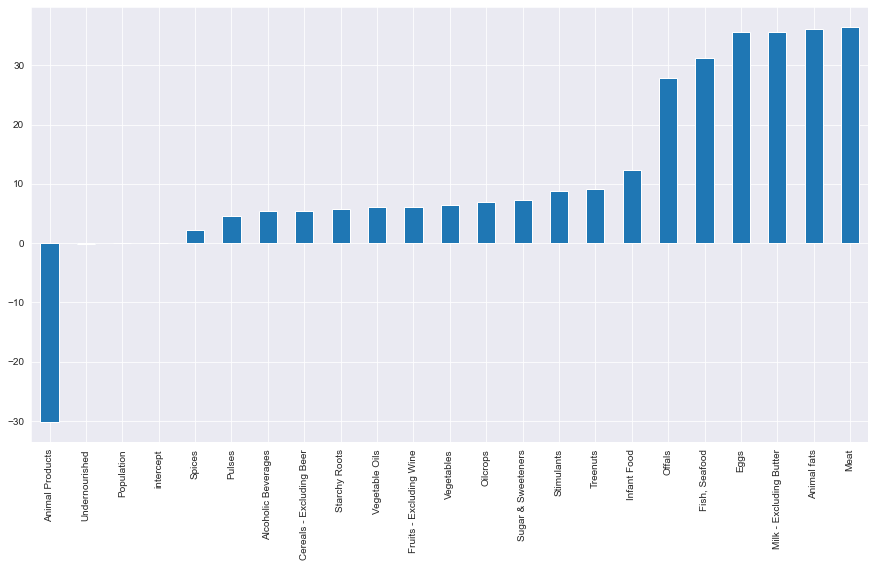

In [69]:
plt.figure(figsize=(15,8))
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
coeff.plot(kind='bar')

In [70]:
#Model Test
y_pred = lr.predict(X_test)

In [71]:
# calculating MSE; closer to zero is better
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# calculating R-Square; closer to 1 is better
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 23.31
R-Square: 0.72


Our worst offenders are still our top ranked  only their values are even higher now.

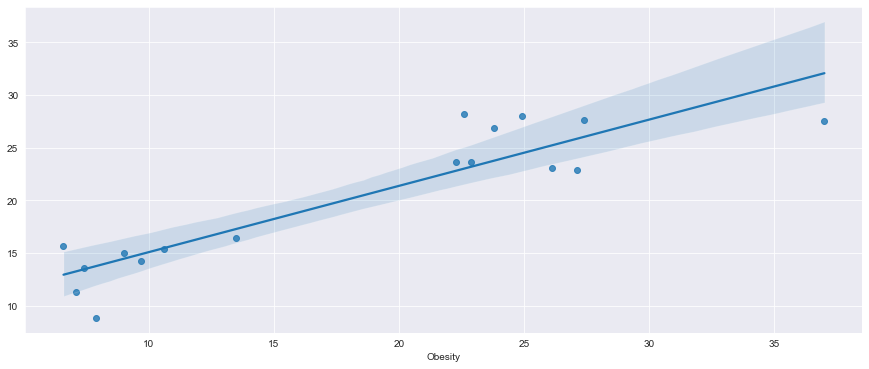

In [72]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred)
plt.show()

Finally we'll remove both Vegetal Products and Animals Products. 

In [73]:
# including all previous columns, only dropping the dependent variable 'Obesity'
df_CrossValidation = df.drop(labels=['Country','Vegetal Products', 'Animal Products'], axis=1) #because scikit can't have non-numerical data. 
X = df_CrossValidation.drop(labels='Obesity', axis=1)

# ensuring our y (prediction) is only included
y = df_CrossValidation['Obesity']



In [74]:
# the 'test_size' parameter is where we'll change our ratio mentioned above
# 'random state' refers to the 'seed' used to ensure we have the same starting point each time we run this model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=5600)

In [75]:
#Printing shape to see the split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(151, 22)
(17, 22)
(151,)
(17,)


In [76]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:>

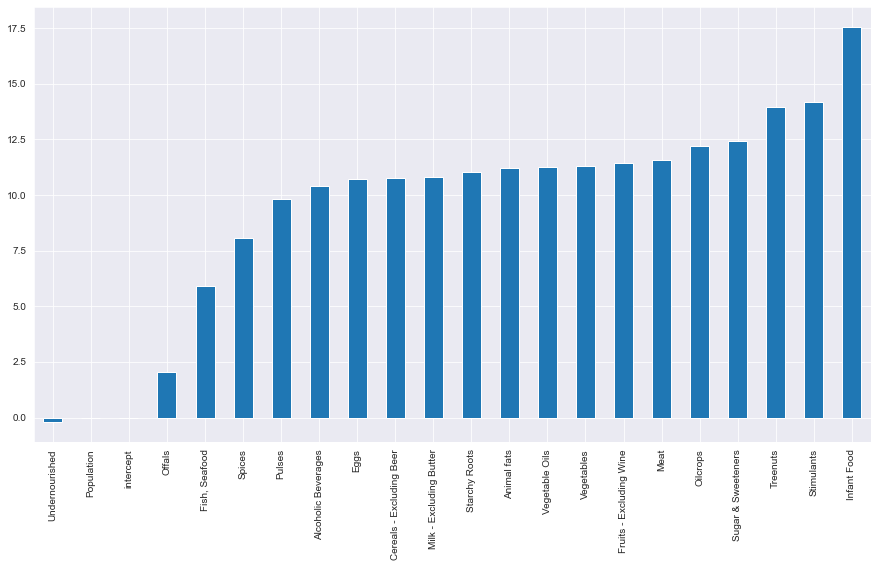

In [77]:
plt.figure(figsize=(15,8))
coeff = pd.Series(data=lr.coef_, index=X.columns).sort_values()
coeff.plot(kind='bar')

In [78]:
#Model Test
y_pred = lr.predict(X_test)

In [79]:
# calculating MSE; closer to zero is better
print('MSE:',np.round(mt.mean_squared_error(y_test,y_pred),2))

# calculating R-Square; closer to 1 is better
print('R-Square:',np.round(mt.r2_score(y_test,y_pred),2))

MSE: 24.93
R-Square: 0.7


Interestingly, we now see a fairly dramatic change. Infant Food is taking the top spot along with Stimulants, Treenuts, Sugar, Oilcrops and then finally our previously worst offender, Meat. These are much the same results that would occur when the median values were used to replace the zeros in these columns but without removing Animal or Vegetal Products(not shown in this analysis).

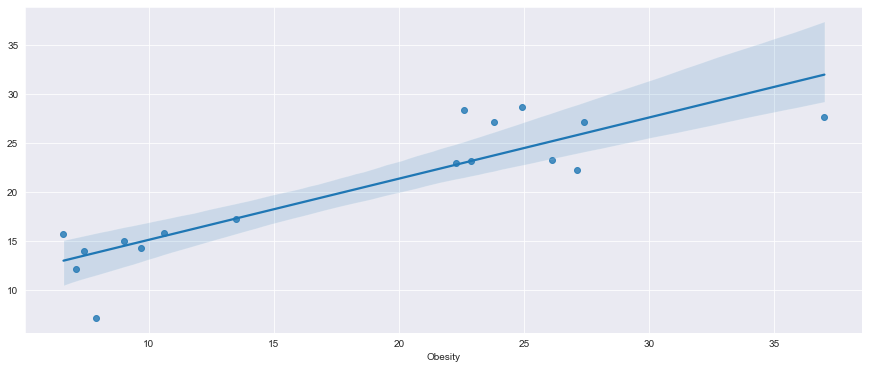

In [80]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_pred)
plt.show()

# Conclusion and Recommendations 

After trying many different permutations we can see some patterns form. First, when the data is left as is, or even when one of our two broad categories are eliminated(both in the case of our ML regression), Meat, Animal Fats, Milk and Eggs, are all significantly correlated with obesity. As a general recommendation then we may say that diets high in calories from Meat, Eggs, Animal Fats, and Milk might want to be avoided if we want to bring our BMI down. However, foods that we know contain fat in plant foods are also correlated to obesity in our modelling. In general then, we may conclude that consuming calories from foods that contain high fat content in general are most correlated with obesity. The phrase "the fat you eat, is the fat you wear" would seem especially apt.  Our two exceptions to this would be Sugar, and Infant Food. Sugar we may expect, but Infant Food certainly stands out.  Since we would assume Infant Food is eaten by infants, it's worth noting the potential relationship to the general population. Studying the relationship of Infant Food consumption to obesity could an area worthy of future exploration.  

Proponents of an animal based diet would most likely want to argue that an area of further exploration would be to bring in data on exercise, smoking, income and processed foods, and what other foods are consumed along with the animal products. Proponents of the keto diet, which is a diet high in percentage of mostly animal fats(although vegan versions exist too) might argue it's the total calories or excess carbohydrates and not fats. Since there is no country in our dataset that follows a keto diet or entirely animal based diet, this was not tested. 

In the final analysis, based on our OLS linear regression model we can reject the null hypthesis and state that diets with a high percentage of calories coming from some of our food categories are moderately high in correlation to obesity. 

In [81]:
df.to_csv('capstone.csv', index = False) # Exporting our cleaned and final dataframe as a csv for use in Tableau. 